# House Price Regression

Gerekli kütüphaneleri yükleyerek projemize başlıyoruz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

pd.set_option('display.max_columns', None)

Csv dosyasını yükleyip datayı incelemeye başlıyoruz.

In [2]:
price_data = pd.read_csv("train.csv")
price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
price_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
price_data.shape

(1460, 81)

Veri setimizdeki 81 sütunun açıklamalarına bakalım.

* **SalePrice:** the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** $Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale

In [5]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


Datadaki eksik verileri inceleyelim. %50 üzerinde boş veriye sahip olan sütunları silebiliriz.

In [7]:
total = price_data.isnull().sum().sort_values(ascending=False)
percent = (price_data.isnull().sum()*100/price_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.521
MiscFeature,1406,96.301
Alley,1369,93.767
Fence,1179,80.753
FireplaceQu,690,47.260
LotFrontage,259,17.740
GarageCond,81,5.548
GarageType,81,5.548
GarageYrBlt,81,5.548
GarageFinish,81,5.548


In [8]:
price_data = price_data.drop((missing_data[missing_data['Total'] > 1178]).index,1)

In [9]:
total = price_data.isnull().sum().sort_values(ascending=False)
percent = (price_data.isnull().sum()*100/price_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
FireplaceQu,690,47.260
LotFrontage,259,17.740
GarageYrBlt,81,5.548
GarageType,81,5.548
GarageFinish,81,5.548
GarageQual,81,5.548
GarageCond,81,5.548
BsmtExposure,38,2.603
BsmtFinType2,38,2.603
BsmtFinType1,37,2.534


In [10]:
price_data.isnull().sum()*100/price_data.shape[0]

Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
                 ...  
MoSold           0.000
YrSold           0.000
SaleType         0.000
SaleCondition    0.000
SalePrice        0.000
Length: 77, dtype: float64

In [11]:
price_data.select_dtypes(object).nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

# Target Feature

Hedef değişkenimiz olan SalePrice sütununu inceleyelim.

In [12]:
price_data['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

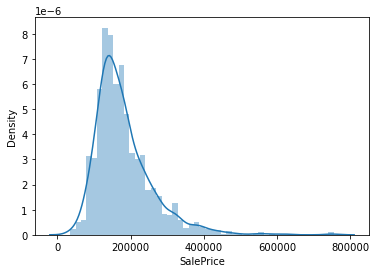

In [13]:
sns.distplot(price_data['SalePrice']);

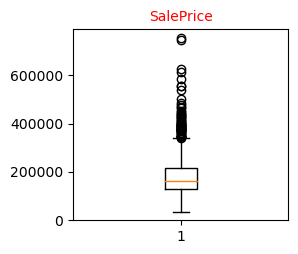

In [14]:
baslik_font={'color':'red','size':10}
eksen_font={'weight':'bold','size':8}
plt.figure(figsize=(10,7),dpi=100)
fill_list=['SalePrice']
for i,col in enumerate(fill_list):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=price_data)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

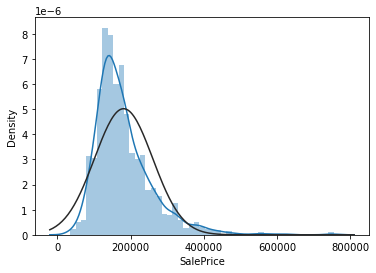

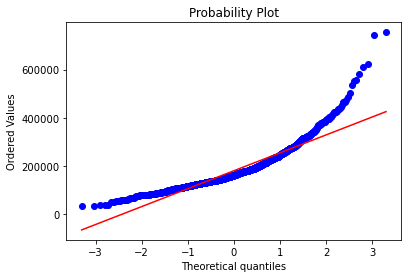

In [15]:
sns.distplot(price_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(price_data['SalePrice'], plot=plt)

SalePrice datasının normal dağılmadığını ve outlierlara sahip olduğunu grafiklerden gözlemliyoruz.

# EDA

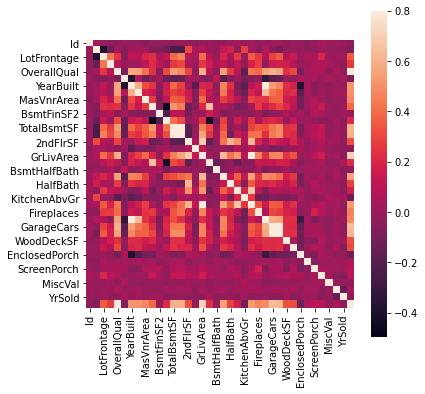

In [16]:
corrmat = price_data.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
igsize=(20,20)
korelasyon_mat_price_data = price_data.corr()

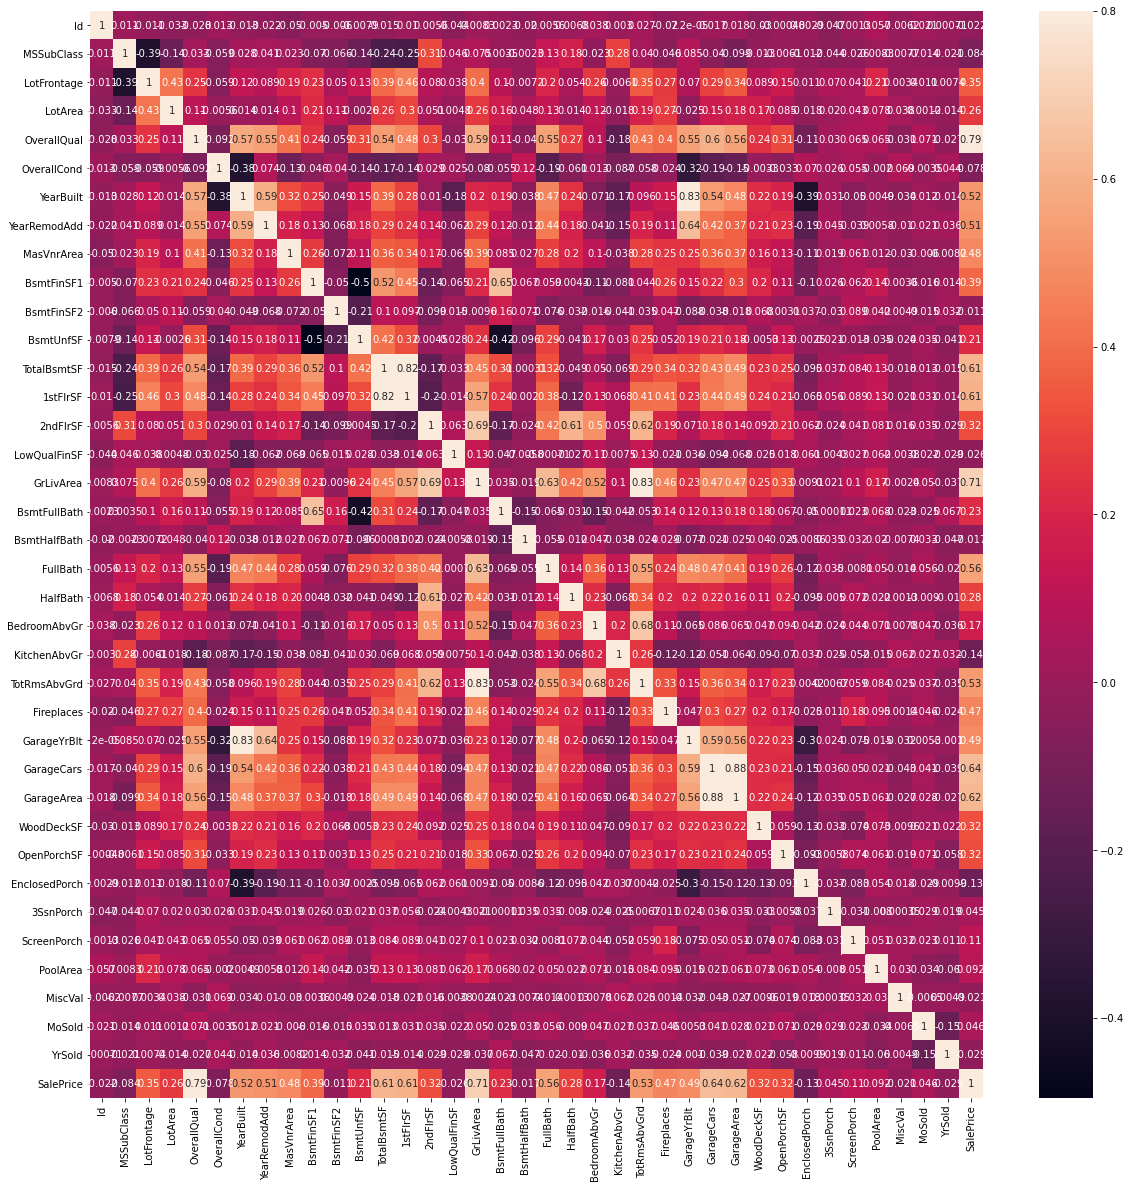

In [18]:
corrmat = price_data.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True);

Datamızdaki değişkenlerin birbirleri ile korelasyonunu heatmap ile inceliyoruz. Sonrasında hedef değişkenimizle 0.50den fazla korelasyon gösteren değişkenlerin olduğu heatmapi yazdırıyoruz. Böylece hedef değişkenimiz için anlam ifade eden diğer değişkenleri bulmaya yaklaşıyoruz.

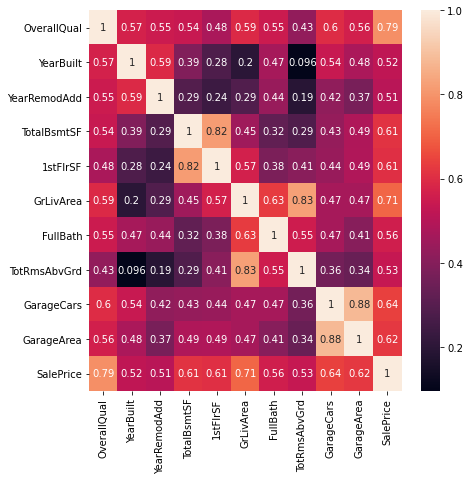

In [19]:
corrmat = price_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(7,7))
g = sns.heatmap(price_data[top_corr_features].corr(),annot=True)

OverallQual ile SalePrice yüksek bir korelasyon değerine sahip. İki değişkenin ilişkisine boxplot yardımıyla bakalım.

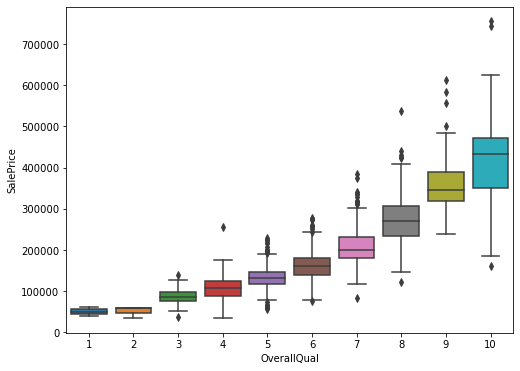

In [20]:
var = 'OverallQual'
data = pd.concat([price_data['SalePrice'], price_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

Diğer korelasyonu yüksek değişkenlerimizi de bakalım.

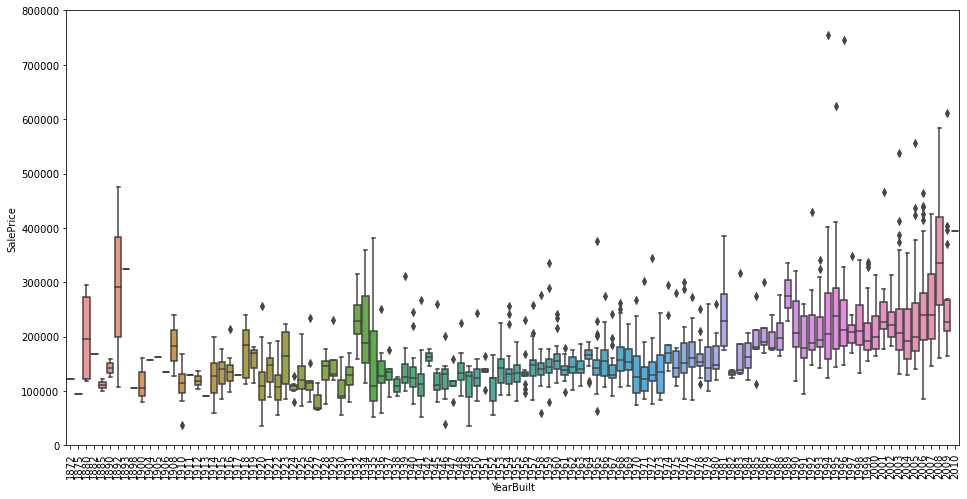

In [21]:
var = 'YearBuilt'
data = pd.concat([price_data['SalePrice'], price_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Text(0, 0.5, 'SalePrice')

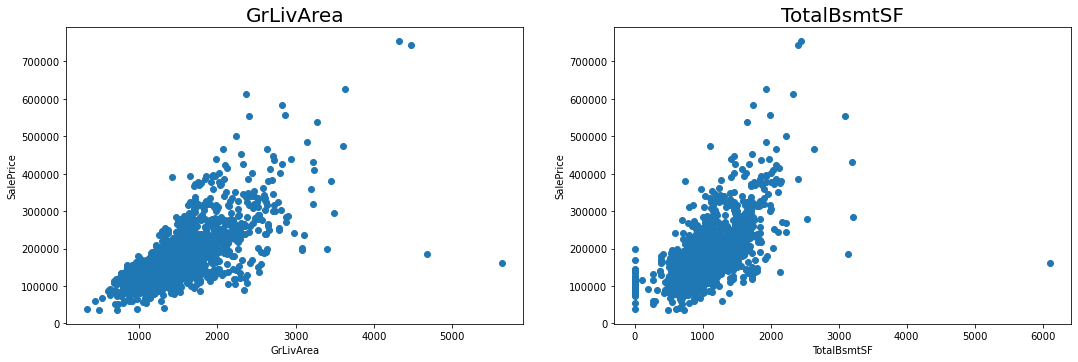

In [22]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.scatter(price_data['GrLivArea'], price_data['SalePrice'])
plt.title('GrLivArea', fontsize=20)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(2, 2, 2)
plt.scatter(price_data['TotalBsmtSF'], price_data['SalePrice'])
plt.title('TotalBsmtSF', fontsize=20)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

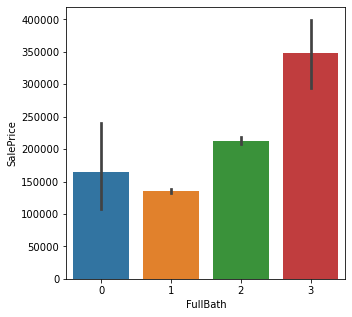

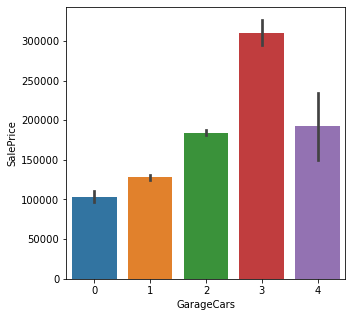

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x='FullBath',y = 'SalePrice',data=price_data)
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x='GarageCars',y = 'SalePrice',data=price_data)
plt.show()

Önceden bahsettiğim gibi SalePrice değişkenimizde outlierlar vardı. Log transform yaparak normal dağılıma yaklaştırıyoruz.

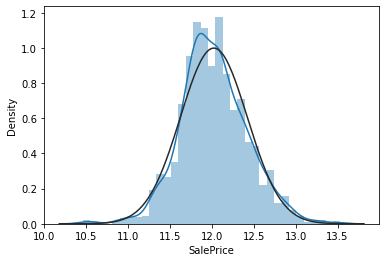

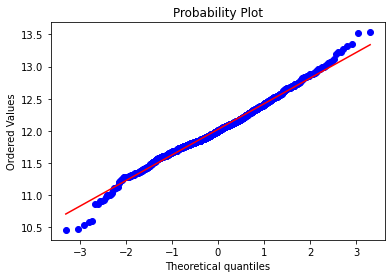

In [24]:
price_data['SalePrice'] = np.log(price_data['SalePrice'])
sns.distplot(price_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(price_data['SalePrice'], plot=plt)

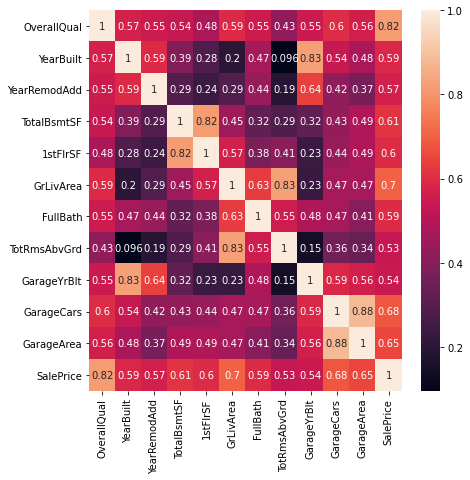

In [25]:
corrmat = price_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(7,7))
g = sns.heatmap(price_data[top_corr_features].corr(),annot=True)

Tekrar korelasyon matrisine baktığımızda GarageYrBlt eklendiğini görüyoruz.

GarageCars ve GarageArea değişkenleri yüksek korelasyona sahip. Modelimizi oluşturmak için GarageCars değişkenini kullanacağız. Çünkü SalePrice yani hedef değişkenimiz ile korelasyonu daha yüksek.

In [26]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    price_data[col] = price_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    price_data[col] = price_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    price_data[col] = price_data[col].fillna('None')

Eksik veriler NaN olarak görünüyordu. Onları "0" ve "None" ile değiştiriyoruz.

In [27]:
price_data['TotalSF'] = price_data['TotalBsmtSF'] + price_data['1stFlrSF'] + price_data['2ndFlrSF']

Elimizde 3 adet metrekareyi gösteren değişken var. Bunları birleştirerek TotalSF olarak yeni bir değişken oluşturuyoruz. Şimdi de bu yeni değişkenin hedef değişkenimizle ilişkisini inceleyelim.

Text(0, 0.5, 'SalePrice')

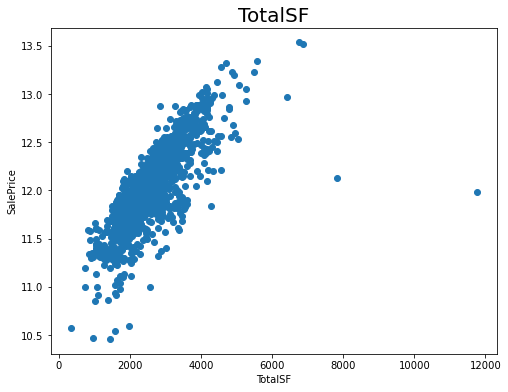

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(price_data['TotalSF'], price_data['SalePrice'])
plt.title('TotalSF', fontsize=20)
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')

Şimdi de banyo sayılarını inceleyelim. Elimizde 4 farklı değişken var. Bunların hepsini toplayarak yeni bir TotalBaths değişkeni oluşturalım.

In [29]:
price_data[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1
...,...,...,...,...
1455,0,0,2,1
1456,1,0,2,0
1457,0,0,2,0
1458,1,0,1,0


In [30]:
price_data["TotalFullBath"] = price_data["FullBath"] + price_data["BsmtFullBath"]
price_data["TotalHalfBath"] = price_data["HalfBath"]  + price_data['BsmtHalfBath']
price_data["TotalBaths"] = price_data["TotalFullBath"]+ price_data['TotalHalfBath']

price_data[["TotalBaths"]] 

,TotalBaths
0,4
1,3
2,4
3,2
4,4
...,...
1455,3
1456,3
1457,2
1458,2


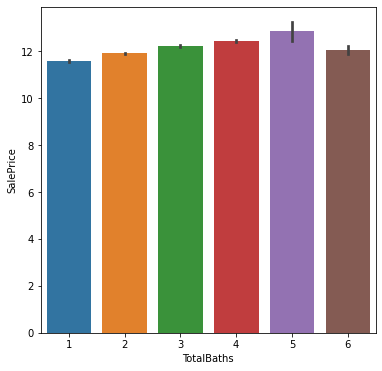

In [31]:
plt.figure(figsize=(6,6))
sns.barplot(x='TotalBaths',y = 'SalePrice',data=price_data)
plt.show()

TotalBsmtSF, 1stFlrSF, 2ndFlrSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath değişkenlerini silebiliriz. Bunlar dışında yüksek korelasyona sahip olmayan ve kullanmayacağımız değişkenleri de silelim.

In [32]:
price_data = price_data.drop(['Id','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalFullBath', 'TotalHalfBath', 'FullBath', 'HalfBath', 'BsmtFullBath','BsmtHalfBath'], axis=1)

Şimdi tekrar korelasyon matrisimize bakalım.

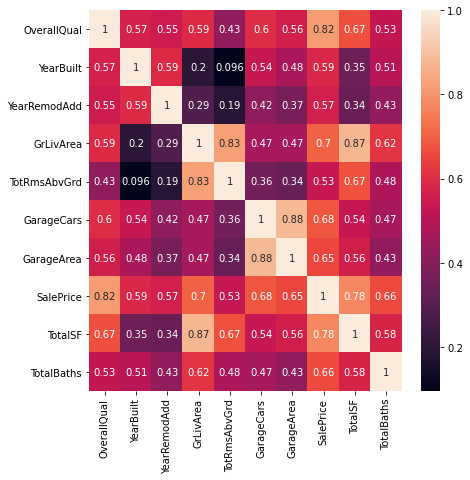

In [33]:
corrmat = price_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(7,7))
g = sns.heatmap(price_data[top_corr_features].corr(),annot=True)

Yeni eklediğimiz değişkenlerin de korelasyonlarının yüksek olduğunu görüyoruz.

In [34]:
price_data = pd.get_dummies(price_data)

In [35]:
price_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalBaths,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,Garag

In [36]:
total = price_data.isnull().sum().sort_values(ascending=False)
percent = (price_data.isnull().sum()/price_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177
MasVnrArea,8,0.005
SaleCondition_Partial,0,0.000
Condition2_PosA,0,0.000
Condition1_RRAn,0,0.000


Korelasyonu 0.60 ve üstü olanları modelimiz için seçiyoruz.

In [37]:
Y = price_data['SalePrice']
X = price_data[['YearBuilt', 'GarageCars', 'TotalSF', 'GrLivArea', 'TotalBaths', 'OverallQual']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 250)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1039 to 589
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    1168 non-null   int64
 1   GarageCars   1168 non-null   int64
 2   TotalSF      1168 non-null   int64
 3   GrLivArea    1168 non-null   int64
 4   TotalBaths   1168 non-null   int64
 5   OverallQual  1168 non-null   int64
dtypes: int64(6)
memory usage: 63.9 KB


In [40]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
OverallQual,0,0.000
TotalBaths,0,0.000
GrLivArea,0,0.000
TotalSF,0,0.000
GarageCars,0,0.000
YearBuilt,0,0.000


In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 408 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    292 non-null    int64
 1   GarageCars   292 non-null    int64
 2   TotalSF      292 non-null    int64
 3   GrLivArea    292 non-null    int64
 4   TotalBaths   292 non-null    int64
 5   OverallQual  292 non-null    int64
dtypes: int64(6)
memory usage: 16.0 KB


In [42]:
X_train.head(10)

,YearBuilt,GarageCars,TotalSF,GrLivArea,TotalBaths,OverallQual
1039,1970,1,1260,630,2,4
829,2005,2,1743,1223,3,7
365,1920,1,2016,1344,1,5
921,1900,0,3472,2200,6,5
908,1983,2,1766,902,2,5
354,1940,1,2535,1595,1,6
713,1970,2,1920,960,2,4
498,1967,1,1763,899,1,5
244,1994,2,3058,2110,4,7
1361,2005,2,3060,1530,3,7


In [43]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [44]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [1.58654626e-03 8.54919554e-02 1.32884955e-04 5.30024055e-05
 5.63879952e-02 1.03818864e-01]
Sabit değer (bias): 
 7.553730013096496


In [45]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1103.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        18:21:50   Log-Likelihood:                 520.38
No. Observations:                1460   AIC:                            -1027.
Df Residuals:                    1453   BIC:                            -989.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.5537      0.416     18.174      0.000       6.738       8.369
YearBuilt       0.0016      0.000      7.251      0.000       0.001       0.002
GarageCars      0.0855      0.008     10.571      0.000       0.070       0.101
TotalSF         0.0001   1.24e-05     10.714      0.000       0.000       0.000
GrLivArea      5.3e-05      2e-05      2.649      0.008    1.37e-05    9.23e-05
TotalBaths      0.0564      0.007      7.934      0.000       0.042       0.070
OverallQual     0.1038      0.005     20.270      0.000       0.094       0.114
==============================================================================
Omnibus:                      910.326   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30496.166
Skew:                          -2.357   Prob(JB):                         0.00
Kurtosis:                      24.888   Cond. No.                     3.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared değerimiz 0.82'dir. 0.70'den büyük olmasını istiyorduk. ElasticNet regresyonunu deneyelim. R-squared değerimiz 0 olduğu için bu modeli kullanabiliriz. Overfit ya da underfit durumu yoktur.

In [46]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.012820131745099994
Mean absolute error of the prediction is: 0.31759535621663065
Mean squared error of the prediction is: 0.16892435357574237
Root mean squared error of the prediction is: 0.4110040797555936
Mean absolute percentage error of the prediction is: 2.664212879906158


# KNN

In [47]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()

knn = neighbors.KNeighborsRegressor(n_neighbors=19)

In [48]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6834256613947074

In [49]:
knn.score(X_train,y_train)

0.7361747619551579

In [50]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6834256613947074

In [51]:
knn.score(X_train,y_train)

0.7361747619551579

In [52]:
knn_pred_y_test = knn.predict(X_test)
knn_pred_y_train = knn.predict(X_train)

In [53]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [54]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, knn_pred_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, knn_pred_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, knn_pred_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - knn_pred_y_test) / y_test)) * 100))

Mean absolute error of the prediction is: 0.16070781122060382
Mean squared error of the prediction is: 0.052800209860980524
Root mean squared error of the prediction is: 0.22978296251241198
Mean absolute percentage error of the prediction is: 1.3567899438146125


In [55]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_train, knn_pred_y_train)))
print("Mean squared error of the prediction is: {}".format(mse(y_train, knn_pred_y_train)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_train, knn_pred_y_train)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_train - knn_pred_y_train) / y_train)) * 100))

Mean absolute error of the prediction is: 0.1463884371715194
Mean squared error of the prediction is: 0.04147107311629882
Root mean squared error of the prediction is: 0.20364447725459883
Mean absolute percentage error of the prediction is: 1.2220000258152786


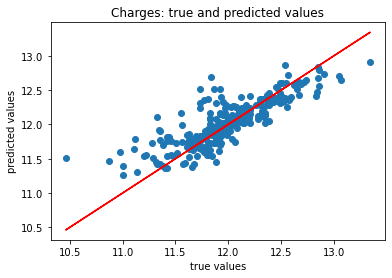

In [56]:
plt.scatter(y_test, knn_pred_y_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

# Decision Tree

In [57]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [58]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 0.20


# Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [60]:
from sklearn.metrics import mean_squared_error as MSE
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("RMSE value (Random Forest): {:.2f}".format(rmse_test))

RMSE value (Random Forest): 0.17


# Support Vector Machines (SVM)

In [61]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 0.54


# XGBoost

In [62]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [63]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.173026


In [64]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [65]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 0.393152


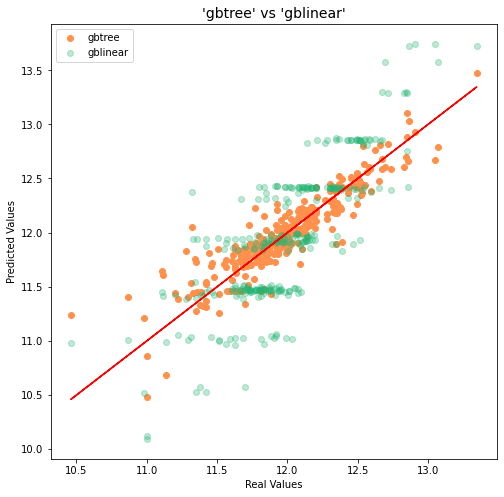

In [66]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

In [67]:
price_data_dmatrix = xgb.DMatrix(data=X, label=Y)
params = {"objective":"reg:squarederror", "max_depth":4}
price_data_cv = xgb.cv(dtrain=price_data_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(price_data_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
28,0.113,0.002,0.159,0.011
27,0.114,0.001,0.159,0.011
25,0.116,0.001,0.159,0.011
24,0.117,0.001,0.159,0.011
26,0.115,0.001,0.159,0.011


In [68]:
house_prices_dmatrix = xgb.DMatrix(data=X, label=Y)
params = {"objective":"reg:squarederror", "max_depth":4}
house_prices_cv = xgb.cv(dtrain=house_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(house_prices_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
28,0.083,0.001,0.111,0.004
27,0.083,0.001,0.111,0.004
25,0.085,0.001,0.112,0.004
26,0.084,0.001,0.112,0.004
24,0.086,0.001,0.112,0.004


In [69]:
house_prices_dmatrix = xgb.DMatrix(data=X, label=Y)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=house_prices_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [70]:
print("Best 11 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

Best 11 values:


,l1,rmse
9,0.100,0.156
2,0.030,0.156
5,0.060,0.156
8,0.090,0.156
6,0.070,0.157


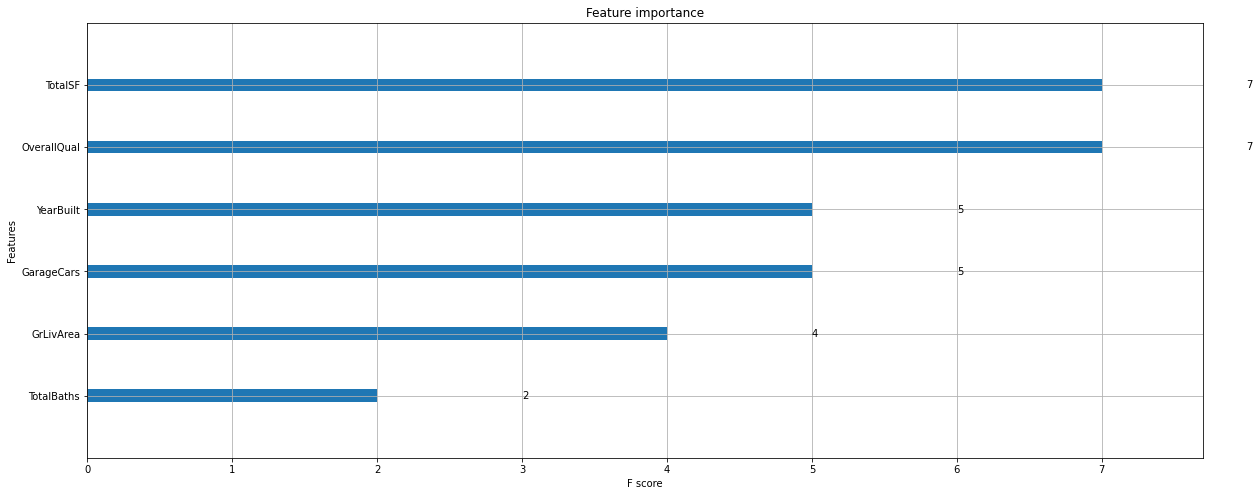

In [71]:
import matplotlib.pyplot as plt
house_prices_dmatrix = xgb.DMatrix(data=X, label=Y)

best_parametes = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3
                      }

house_prices_model = xgb.train(params=best_parametes, dtrain=house_prices_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(house_prices_model)
ax.figure.set_size_inches(20,8)
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import Normalizer

params = {
        'learning_rate': [0.1, 0.3, 0.5],
        'max_depth': [1, 3, 5],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.1, 0.3, 0.5],
        'colsample_bytree': [0.1, 0.3, 0.5],
        'n_estimators' : [100, 250, 500, 750, 1000],
        'objective': ['reg:squarederror']
}

xgbr_grid = GridSearchCV(estimator = XGBRegressor(),
                         param_grid = params,
                         cv = 3)

xgbr_grid.fit(X, Y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [78]:
print('Best Score: ', xgbr_grid.best_score_)
print('Best Params: ', xgbr_grid.best_params_)

Best Score:  0.8491505818196168
Best Params:  {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 750, 'objective': 'reg:squarederror', 'subsample': 0.5}


# Light GBM

In [79]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [80]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [81]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSE: 0.163040


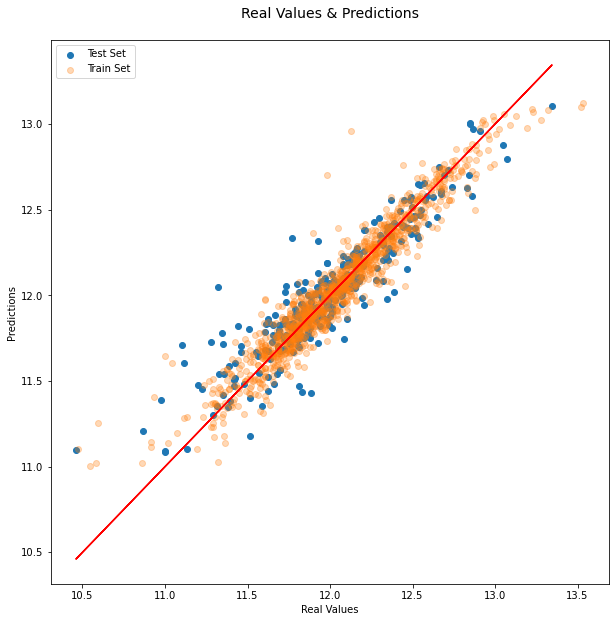

In [82]:
plt.figure(figsize=(10,10))
plt.title('Real Values & Predictions\n', size = 14)
ax1 = plt.scatter(y_test, y_predict)
ax2 = plt.scatter(y_train, y_predict_train,alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Set', 'Train Set'))
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

En iyi skoru XGBoost modeli verdi.